In [7]:
!pip3 install yfinance --upgrade --no-cache-dir

    100% |################################| 10.0MB 9.3MB/s ta 0:00:011
    100% |################################| 17.2MB 61.3MB/s a 0:00:011
    100% |################################| 61kB 51.6MB/s ta 0:00:01
    100% |################################| 512kB 68.6MB/s ta 0:00:01
    100% |################################| 235kB 10.2MB/s ta 0:00:01
    100% |################################| 163kB 74.0MB/s ta 0:00:01
    100% |################################| 153kB 66.6MB/s ta 0:00:01
    100% |################################| 61kB 54.4MB/s ta 0:00:01
Requirement already up-to-date: chardet<3.1.0,>=3.0.2 in /usr/local/lib/python3.5/dist-packages (from requests>=2.20->yfinance)
  Found existing installation: pytz 2017.3
    Uninstalling pytz-2017.3:
      Successfully uninstalled pytz-2017.3
  Found existing installation: six 1.11.0
    Uninstalling six-1.11.0:
      Successfully uninstalled six-1.11.0
  Found existing installation: python-dateutil 2.6.1
    Uninstalling python-dateut

In [23]:
!pip3 install statsmodels

You are using pip version 8.1.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.485
Date:                Wed, 03 Jul 2019   Prob (F-statistic):             0.0416
Time:                        15:42:20   Log-Likelihood:                 11203.
No. Observations:                3679   AIC:                        -2.240e+04
Df Residuals:                    3674   BIC:                        -2.237e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Friday         0.0015      0.000      3.436      0.0

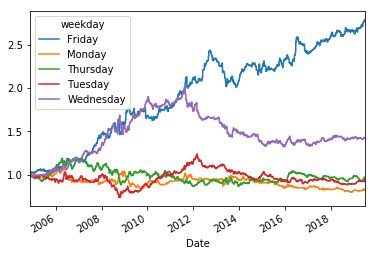

In [68]:
import yfinance as yf
import pandas as pd 
import statsmodels.api as sm

gld = yf.Ticker('GLD')
gld = gld.history(period="max")
returns = gld['Close']/gld['Close'].shift(1) -1
returns = returns.dropna().to_frame('return')\
                 .assign(weekday = lambda x: x.index.day_name())
dummies = pd.get_dummies(returns['weekday'])
data = pd.concat([returns['return'], dummies], axis=1)
mod = sm.OLS(data['return'], data.drop('return', axis=1))
res = mod.fit()
print(res.summary())

strategy = returns.set_index('weekday', append=True)['return'].unstack('weekday')\
                  .fillna(0.0)
perf = (1 + strategy).cumprod()
perf.plot()